<a href="https://colab.research.google.com/github/heesukjang/W210-Capstone---Waste-Sorting/blob/main/WasteSorting_FeatureExtraction_CNN_Heesuk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [ ]:
# #@title
# %%time
# %%capture

# ### Installing any uninstalled dependencies for the Python kernel
# import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install opencv-python
# !{sys.executable} -m pip install rembg
# !{sys.executable} -m pip install scikit-image
# !{sys.executable} -m pip install scikit-learn
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install seaborn

In [ ]:
# # write .py file with the print content
# %%writefile test_heesuk.py
# print('hello')

In [ ]:
# # read the same .py file in python3
# !python3 test_heesuk.py

In [ ]:
!pip install pillow_heif rembg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 12.1 MB/s eta 0:00:00


In [ ]:
#@title
%%time
### Imports

import numpy as np
import matplotlib.pyplot as plt
import skimage.feature as feature
import cv2
import os
import matplotlib.image as mpimg
from skimage.util import img_as_ubyte
from rembg import remove
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import IncrementalPCA
from skimage.feature import hog
from scipy.ndimage import convolve
from scipy import signal
import pandas as pd
from sklearn.cluster import DBSCAN
import copy
import seaborn as sns

from skimage.feature import hog
from scipy.ndimage import convolve
from scipy import signal

from sklearn.manifold import TSNE
from skimage.filters import prewitt_h, prewitt_v
from skimage import filters
from skimage.feature import haar_like_feature_coord
from skimage.feature import draw_haar_like_feature
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageFilter
from scipy.cluster.vq import kmeans
from scipy.cluster.vq import vq
from scipy.cluster.vq import whiten
import joblib
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from IPython.display import display
from sklearn.model_selection import StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score, recall_score, precision_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import ast
import glob

CPU times: user 50 s, sys: 760 ms, total: 50.7 s
Wall time: 59.7 s


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
# !pip install --upgrade tensorflow
# !pip install --upgrade tensorflow-gpu

In [ ]:
#@title
%%time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.utils import layer_utils
# from keras.utils.layer_utils import count_params
# from tensorflow.keras.utils import count_params
from tensorflow.keras.layers import RandomFlip
from tensorflow.keras.layers import RandomZoom
from tensorflow.keras.layers import RandomRotation
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import Multiply
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import PReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import SeparableConv1D
from tensorflow.keras.layers import SeparableConv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

CPU times: user 24.1 ms, sys: 8.11 ms, total: 32.2 ms
Wall time: 60.8 ms


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tensorflow.keras.preprocessing import image
from PIL import Image
from collections import Counter

# !pip install pillow_heif
from pillow_heif import register_heif_opener

# Register the HEIF opener
register_heif_opener()

# #@title
# %%time
# Hide warnings for final output
import warnings

warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Ensure to Add Shortcut of "MIDS_Capstone" folder to MyDrive from "Shared with me" first to be able to load images to your Colab notebook:
1. Right click on the "MIDS_Capstone" folder
2. Select "Organize" => "Add Shortcut" => Select "MyDrive"

In [ ]:
# # # find # of files

# drinkingwaste_path = '/content/drive/MyDrive/MIDS_Capstone/Datasets/rawimgs/'
# drinkingwaste_folders = os.listdir(drinkingwaste_path)
# print(f'drinkingwaste_folders = {drinkingwaste_folders}')

# if '.DS_Store' in drinkingwaste_folders:
#     drinkingwaste_folders.remove('.DS_Store')

# df_dw = pd.DataFrame(columns = drinkingwaste_folders)

# for f in drinkingwaste_folders:
#   folder_path = os.path.join(drinkingwaste_path, f)

#   if os.path.isdir(folder_path):
#     print(f'folder_path = {folder_path}')
#     print(f'f = {f}')
#     files_in_folder = os.listdir(folder_path)
#     print(f'files_in_folder = {files_in_folder}')
#     num_files = len(files_in_folder)

#     df_dw.loc[0, f] = num_files


# print(df_dw)


# # dringkingwaste_pet_images = img2np(path = drinkingwaste_pet_path, list_of_filename = os.listdir(drinkingwaste_pet_path))

In [ ]:

# def count_imgs_in_each_class(folder_name):
#   trashbox_train_path = '/content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_dataset_subfolders/'
#   # drinkingwaste_path = '/content/drive/MyDrive/MIDS Capstone/Datasets/rawimgs/'
#   trashbox_train_subfolders = os.listdir(trashbox_train_path + folder_name)
#   # print(f'trashbox_train_subfolders = {trashbox_train_subfolders}')

#   df_dw = pd.DataFrame(columns = trashbox_train_subfolders)

#   # if '.DS_Store' in trashbox_train_path:
#   #     trashbox_train_path.remove('.DS_Store')
#   # if '.DS_Store' in trashbox_train_subfolders:
#   #     trashbox_train_subfolders.remove('.DS_Store')

#   if folder_name == 'glass' or folder_name == 'cardboard':
#     print(f'Count of "{folder_name}" images = {len(trashbox_train_subfolders)}')
#     print('==========================================')
#     # df_dw.loc[0, folder_name] = num_files
#   # if 'glass' not in trashbox_train_subfolders and 'cardboard' not in trashbox_train_subfolders:

#   else:
#     # if '.DS_Store' in trashbox_train_subfolders:
#     #   trashbox_train_subfolders.remove('.DS_Store')

#     print(f'Count of "{folder_name}" images:\n')
#     for f in trashbox_train_subfolders:
#       print(f'f = {f}')

#       folder_path = os.path.join(trashbox_train_path, f)
#       print(f'folder_path = {folder_path}')

#       if os.path.isdir(folder_path):
#         # print(f)
#         files_in_folder = os.listdir(folder_path)
#         num_files = len(files_in_folder)
#         # print(f'Count of {f} images:\n')
#         df_dw.loc[0, f] = num_files


#     print(df_dw)
#     print('==========================================')

# count_imgs_in_each_class('plastic')
# count_imgs_in_each_class('paper')
# count_imgs_in_each_class('metal')
# count_imgs_in_each_class('medical')
# count_imgs_in_each_class('glass')
# count_imgs_in_each_class('e-waste')
# count_imgs_in_each_class('cardboard')

In [ ]:
#@title
%%time

trashbox_train_path = '/content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/'
label_dict = {0: "plastic",
              1: "paper",
              2: "metal",
              3: "medical",
              4: "glass",
              5: "e_waste",
              6: "cardboard"
             }

label_list = ["Plastic", "Paper", "Metal", "Medical", "Glass", "E-Waste", "Cardboard"]

plastic_image_dir_path = trashbox_train_path + 'plastic'
paper_image_dir_path = trashbox_train_path + 'paper'
metal_image_dir_path = trashbox_train_path + 'metal'
medical_image_dir_path = trashbox_train_path + 'medical'
glass_image_dir_path = trashbox_train_path + 'glass'
e_waste_image_dir_path = trashbox_train_path + 'e_waste'
cardboard_image_dir_path = trashbox_train_path + 'cardboard'

processed_image_path_list = [plastic_image_dir_path,
                              paper_image_dir_path,
                              metal_image_dir_path,
                              medical_image_dir_path,
                              glass_image_dir_path,
                              e_waste_image_dir_path,
                              cardboard_image_dir_path
                            ]



CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 13.1 µs


In [ ]:
%%time
folder_list = ["plastic",
              "paper",
              "metal",
              "medical",
              "glass",
              "e_waste",
              "cardboard"
              ]
current_path = os.getcwd()
for folder in folder_list:
    if not os.path.exists(os.path.join(current_path, folder)):
        os.makedirs(os.path.join(current_path, folder))

# %%time
# folder_list = ["plastic cups",
#                "plastic containers",
#                "plastic bottles",
#                "plastic bags",
#                "cigarette butt",
#                "tetra pak",
#                "paper_cups",
#                "paper",
#                "news paper",
#                "spray cans",
#                "other metal objects",
#                "metal containers",
#                "construction scrap",
#                "beverage cans",
#                "syringe",
#                "medicines",
#                "masks",
#                "gloves",
#                "glass",
#                "smartphones",
#                "small appliances",
#                "laptops",
#                "electronic chips",
#                "electrical cables",
#                "cardboard"
#               ]
# current_path = os.getcwd()
# print(f'current_path = {current_path}')
# for folder in folder_list:
#     if not os.path.exists(os.path.join(current_path, folder)):
#         os.makedirs(os.path.join(current_path, folder))

CPU times: user 79 µs, sys: 3 µs, total: 82 µs
Wall time: 86.8 µs


In [ ]:
# !mv *.jpg /content/paper/

In [ ]:

!echo "Count of plastic images"
!ls -ltr /content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/plastic/*.jpg|wc -l

!echo "Count of paper images"
!ls -ltr /content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/paper/*.jpg|wc -l

!echo "Count of metal images"
!ls -ltr /content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/metal/*.jpg|wc -l

!echo "Count of medical images"
!ls -ltr /content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/medical/*.jpg|wc -l

!echo "Count of glass images"
!ls -ltr /content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/glass/*.jpg|wc -l

!echo "Count of e_waste images"
!ls -ltr /content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/e-waste/*.jpg|wc -l

!echo "Count of cardboard images"
!ls -ltr /content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/cardboard/*.jpg|wc -l


Count of plastic images
2135
Count of paper images
2156
Count of metal images
2068
Count of medical images
1585
Count of glass images
2022
Count of e_waste images
2405
Count of cardboard images
1930


### **Preprocessing**

As mentioned in the EDA section, we wanted to preprocess our images to get them into a consistent state. To do this, we applied the following preprocessing steps:

<li> We read the input color image from directory as background-removed resized gray scale images.</li>
<li>We normalize the images to 64 x 64 pixels.</li>
<li>We remove duplicate images using DBSCAN.</li>

Our image counts after applying the preprocessing steps are printed below. We also have printed the average pixel value/standard deviation per category, and have also visualized the "average image" per category as a part of our EDA.

In [ ]:
#@title
%%time
### Preprocessing

def load_resized_images_as_grayscale_from_folder(folder):
    images = []
    file_names = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename)) # Read image
        img = cv2.resize(img, (64, 64)) # Resize to 64 x 64
        img = remove(img) # Remove background
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to grayscale
        if img is not None:
            images.append(img)
            file_names.append(os.path.join(folder,filename))
    return images, file_names
# load_resized_images_as_grayscale_from_folder(plastic_image_dir_path)

def preprocessing(image_dir):
    # Remove duplicates, convert to grayscale, resize to 64 x 64, remove background, normalize pixel values to 0 - 255
    image_set, file_names = load_resized_images_as_grayscale_from_folder(image_dir)
    scaled_image_set = [np.ravel((image / 255)) for image in image_set] # Scaled because DBSCAN calculates distance
    dbs_cluster = DBSCAN(eps=.5, min_samples=2).fit(scaled_image_set)
    clean_image_index = []
    dupl_image_index = []
    deduped_images = []
    duplicate_image_names = []
    for idx, label in enumerate(dbs_cluster.labels_):
         if label == -1:
             clean_image_index.append(idx)
         else: # Duplicates
             index_list = np.where(dbs_cluster.labels_ == label)
             clean_image_index.extend(index_list[0])
             dupl_image_index.extend(index_list[0][1:])

    clean_image_index = list(dict.fromkeys(clean_image_index))
    dupl_image_index = dict.fromkeys(dupl_image_index)

    for i in clean_image_index:
        if i not in dupl_image_index:
            deduped_images.append(scaled_image_set[i].reshape((64, 64)))

    for i in list(dupl_image_index):
         duplicate_image_names.append(file_names[i])

    print(duplicate_image_names)
    print(len(duplicate_image_names))
    return [img_as_ubyte(im) for im in deduped_images]

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 8.58 µs


In [ ]:
#@title
%%time
### Loading data
plastic_data = preprocessing(plastic_image_dir_path)
paper_data = preprocessing(paper_image_dir_path)
metal_data = preprocessing(metal_image_dir_path)
medical_data = preprocessing(medical_image_dir_path)
glass_data = preprocessing(glass_image_dir_path)
e_waste_data = preprocessing(e_waste_image_dir_path)
cardboard_data = preprocessing(cardboard_image_dir_path)

label_plastic = np.zeros(len(plastic_data))
label_paper = np.ones(len(paper_data))
label_metal = np.ones(len(metal_data)) * 2
label_medical = np.ones(len(medical_data)) * 3
label_glass = np.ones(len(glass_data)) * 4
label_e_waste = np.ones(len(e_waste_data)) * 5
label_cardboard = np.ones(len(cardboard_data)) * 6

label = np.concatenate((label_plastic,
                        label_paper,
                        label_metal,
                        label_medical,
                        label_glass,
                        label_e_waste,
                        label_cardboard
                       ))

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 130GB/s]


In [ ]:
#@title
%%time

print(f"Count of plastic data : {len(plastic_data)}")
print(f"Count of paper data : {len(paper_data)}")
print(f"Count of metal data : {len(metal_data)}")
print(f"Count of medical data : {len(medical_data)}")
print(f"Count of glass data : {len(glass_data)}")
print(f"Count of e_waste data : {len(e_waste_data)}")
print(f"Count of cardboard data : {len(cardboard_data)}")

In [ ]:
# def get_category_mean_std(plastic_data, paper_data, metal_data, medical_data, glass_data, e_waste_data, cardboard_data):
def get_category_mean_std(subclass_data):
    """
    This function calculates category wise mean and standard deviation.
    """
    ctg_chnl_stats = []

    subclass_avg, subclass_std = np.mean(subclass_data), np.std(subclass_data)
    ctg_chnl_stats.append(('plastic', subclass_avg, subclass_std))

    # cardboard_avg, cardboard_std = np.mean(cardboard_data), np.std(cardboard_data)
    # ctg_chnl_stats.append(('cardboard', cardboard_avg, cardboard_std))

    # plates_avg, plates_std = np.mean(plates_data), np.std(plates_data)
    # ctg_chnl_stats.append(('plates', plates_avg, plates_std))

    # paper_avg, paper_std = np.mean(paper_data), np.std(paper_data)
    # ctg_chnl_stats.append(('paper', paper_avg, paper_std))

    # paper_towel_avg, paper_towel_std = np.mean(paper_towel_data), np.std(paper_towel_data)
    # ctg_chnl_stats.append(('paper_towel', paper_towel_avg, paper_towel_std))

    return pd.DataFrame(ctg_chnl_stats, columns = ['category', 'category_avg', 'category_std'])
get_category_mean_std(plastic_data)

In [ ]:
def get_category_mean_std(plastic_data, paper_data, metal_data, medical_data, glass_data, e_waste_data, cardboard_data):
# def get_category_mean_std(subclass_data):
    """
    This function calculates category wise mean and standard deviation.
    """
    ctg_chnl_stats = []

    plastic_avg, plastic_std = np.mean(plastic_data), np.std(plastic_data)
    ctg_chnl_stats.append(('plastic', plastic_avg, plastic_std))

    paper_avg, paper_std = np.mean(paper_data), np.std(paper_data)
    ctg_chnl_stats.append(('paper', paper_avg, paper_std))

    metal_avg, metal_std = np.mean(metal_data), np.std(metal_data)
    ctg_chnl_stats.append(('metal', metal_avg, metal_std))

    medical_avg, medical_std = np.mean(medical_data), np.std(medical_data)
    ctg_chnl_stats.append(('medical', medical_avg, medical_std))

    glass_avg, glass_std = np.mean(glass_data), np.std(glass_data)
    ctg_chnl_stats.append(('glass', glass_avg, glass_std))

    e_waste_avg, e_waste_std = np.mean(e_waste_data), np.std(e_waste_data)
    ctg_chnl_stats.append(('e_waste', e_waste_avg, e_waste_std))

    cardboard_avg, cardboard_std = np.mean(cardboard_data), np.std(cardboard_data)
    ctg_chnl_stats.append(('cardboard', cardboard_avg, cardboard_std))

    return pd.DataFrame(ctg_chnl_stats, columns = ['category', 'category_avg', 'category_std'])


In [ ]:
#@title
%%time
df_ctg_stats = get_category_mean_std(plastic_data,
                                     paper_data,
                                     metal_data,
                                     medical_data,
                                     glass_data,
                                     e_waste_data,
                                     cardboard_data
                                    )
df_ctg_stats

In [ ]:
def get_average_image(data):
    return np.average(np.array([np.array(im) for im in data]), axis=0)     # convert images to np.array

def show_all_average_images(plastic_data,
                            paper_data,
                            metal_data,
                            medical_data,
                            glass_data,
                            e_waste_data,
                            cardboard_data):
    plt.figure(figsize = (16,8))
    plt.suptitle("Average Images per Category")

    ax1 = plt.subplot(1, 4, 1)
    ax1.set_title("Plastic")
    ax1.set_axis_off()
    ax1.imshow(get_average_image(plastic_data), cmap="gray")

    ax2 = plt.subplot(1, 4, 2)
    ax2.set_title("Paper")
    ax2.set_axis_off()
    ax2.imshow(get_average_image(paper_data), cmap="gray")

    ax3 = plt.subplot(1, 4, 3)
    ax3.set_title("Metal")
    ax3.set_axis_off()
    ax3.imshow(get_average_image(metal_data), cmap="gray")

    ax4 = plt.subplot(1, 4, 4)
    ax4.set_title("Medical")
    ax4.set_axis_off()
    ax4.imshow(get_average_image(medical_data), cmap="gray")

    ax5 = plt.subplot(2, 4, 1)
    ax5.set_title("Glass")
    ax5.set_axis_off()
    ax5.imshow(get_average_image(glass_data), cmap="gray")

    ax5 = plt.subplot(2, 4, 2)
    ax5.set_title("E-Waste")
    ax5.set_axis_off()
    ax5.imshow(get_average_image(e_waste_data), cmap="gray")

    ax5 = plt.subplot(2, 4, 3)
    ax5.set_title("Cardboard")
    ax5.set_axis_off()
    ax5.imshow(get_average_image(cardboard_data), cmap="gray")

In [ ]:
%%time
show_all_average_images(plastic_data,
                        paper_data,
                        metal_data,
                        medical_data,
                        glass_data,
                        e_waste_data,
                        cardboard_data)

In [ ]:

# making n X m matrix
def img2np(path, list_of_filename, size = (300, 300)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        im = Image.open(fp, 'r')
        # covert image to a matrix
        img_ts = np.array(im)
        img_ts = img_ts.astype(np.float32) / 255
        try:
            # concatenate different images
            full_mat = full_mat + [img_ts]
        except UnboundLocalError:
            # if not assigned yet, assign one
            full_mat = [img_ts]
    return full_mat

## TrashBox

In [ ]:
# # run it on our folders
# trashbox_cardboard_path = '/content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_dataset_subfolders/cardboard/'
# trashbox_cardboard_images = img2np(path = trashbox_cardboard_path, list_of_filename = os.listdir(trashbox_cardboard_path[:21]))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDriv'

In [ ]:
print('Number of Cardboard Images: ', len(os.listdir(trashbox_cardboard_path)))

In [ ]:
# for i in range(len(trashbox_cardboard_path)):
#   fig0 = plt.figure()
#   plt.imshow(trashbox_cardboard_images[i], interpolation='nearest', aspect='auto')
#   plt.xticks(ticks=[])
#   plt.yticks(ticks=[])
#   plt.show()

_, axs = plt.subplots(np.ceil(len(trashbox_cardboard_images)/10), 10, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(trashbox_cardboard_images, axs):
  ax.imshow(img)
  plt.show()

ValueError: Number of rows must be a positive integer, not 1.0

<Figure size 1200x1200 with 0 Axes>

In [ ]:
# EDA ideas
# Count how many images in each category of each dataset (Class imbalances)
# Size of different images (do we need to resize in cleaning)
# Aspect ratio of different images (proportional ratio of width to height)

## Drinking Waste Classification

In [ ]:
# find # of files

drinkingwaste_path = '/content/drive/MyDrive/MIDS_Capstone/Datasets/rawimgs/'
drinkingwaste_folders = os.listdir(drinkingwaste_path)
if '.DS_Store' in drinkingwaste_folders:
    drinkingwaste_folders.remove('.DS_Store')

df_dw = pd.DataFrame(columns = drinkingwaste_folders)

for f in drinkingwaste_folders:
  folder_path = os.path.join(drinkingwaste_path, f)

  if os.path.isdir(folder_path):
    print(f'folder_path = {folder_path}')
    print(f)
    files_in_folder = os.listdir(folder_path)
    print(f'files_in_folder = {files_in_folder}')
    num_files = len(files_in_folder)

    df_dw.loc[0, f] = num_files


print(df_dw)


#dringkingwaste_pet_images = img2np(path = drinkingwaste_pet_path, list_of_filename = os.listdir(drinkingwaste_pet_path))

folder_path = /content/drive/MyDrive/MIDS_Capstone/Datasets/rawimgs/PET
PET
files_in_folder = ['PET1,625.jpg', 'PET1,478.jpg', 'PET1,760.jpg', 'PET1,754.jpg', 'PET1,578.jpg', 'PET1,672.jpg', 'PET1,662.jpg', 'PET283.jpg', 'PET1,649.jpg', 'PET1,650.jpg', 'PET1,671.jpg', 'PET1,666.jpg', 'PET1,620.jpg', 'PET1,498.jpg', 'PET286.jpg', 'PET1,600.jpg', 'PET1,669.jpg', 'PET280.jpg', 'PET1,579.jpg', 'PET1,516.jpg', 'PET1,618.jpg', 'PET287.jpg', 'PET294.jpg', 'PET1,724.jpg', 'PET1,586.jpg', 'PET1,640.jpg', 'PET1,598.jpg', 'PET1,717.jpg', 'PET1,635.jpg', 'PET324.jpg', 'PET1,505.jpg', 'PET1,609.jpg', 'PET1,479.jpg', 'PET1,525.jpg', 'PET1,580.jpg', 'PET1,549.jpg', 'PET1,568.jpg', 'PET1,764.jpg', 'PET1,770.jpg', 'PET1,709.jpg', 'PET316.jpg', 'PET1,655.jpg', 'PET1,517.jpg', 'PET315.jpg', 'PET1,715.jpg', 'PET1,711.jpg', 'PET1,553.jpg', 'PET1,621.jpg', 'PET1,495.jpg', 'PET1,712.jpg', 'PET1,546.jpg', 'PET303.jpg', 'PET309.jpg', 'PET1,594.jpg', 'PET1,630.jpg', 'PET1,645.jpg', 'PET1,730.jpg', 'PET1,629.jpg

0 1508
1 1232
2 1028
3 1060


<ipython-input-113-9a031258b264>:11: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (folder, value) in enumerate(df_dw.sum().iteritems()):


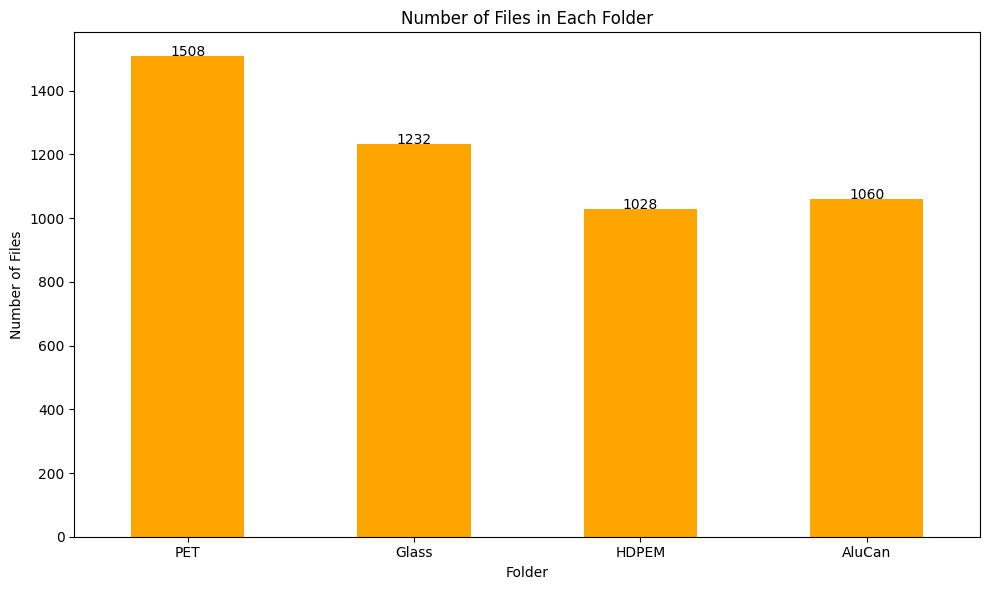

In [ ]:
# plot # of files

plt.figure(figsize=(10, 6))
df_dw.sum().plot(kind='bar', color='orange')
plt.title('Number of Files in Each Folder')
plt.xlabel('Folder')
plt.ylabel('Number of Files')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()

for i, (folder, value) in enumerate(df_dw.sum().iteritems()):
    print(i, value)
    plt.text(i, value + 0.1, str(value), ha='center')

plt.show()

In [ ]:
# find format of images

ff_list = []

for f in drinkingwaste_folders:
  folder_path = os.path.join(drinkingwaste_path, f)

  if os.path.isdir(folder_path):
    files_in_folder = os.listdir(folder_path)

    for file in files_in_folder:
        full_path = os.path.join(folder_path, file)

        root, extension = os.path.splitext(full_path)

        # Extract the file format (extension)
        file_format = extension[1:]  # Remove the leading dot

        ff_list.append(file_format)

ff_list = [s.upper() for s in ff_list]

counter = Counter(ff_list)

ff_sum = [(item, count) for item, count in counter.items()]
df_ff_sum = pd.DataFrame(ff_sum, columns=['Value', 'Frequency'])


print(df_ff_sum)

  Value  Frequency
0   JPG       4820
1  HEIC          8


0 4820
1 8


<Figure size 1000x600 with 0 Axes>

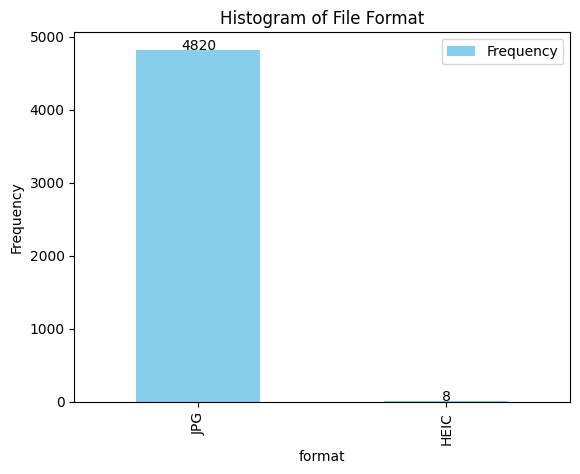

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
df_ff_sum.plot(x='Value', y='Frequency', kind='bar', color='skyblue')
plt.title('Histogram of File Format')
plt.xlabel('format')
plt.ylabel('Frequency')

for i, value in enumerate(df_ff_sum['Frequency']):
    print(i, value)
    plt.text(i, value + 0.1, str(value), ha='center')

plt.show()

In [ ]:
# find shape of images

imgshape_list = []

for f in drinkingwaste_folders:
  folder_path = os.path.join(drinkingwaste_path, f)

  if os.path.isdir(folder_path):
    files_in_folder = os.listdir(folder_path)

    for file in files_in_folder:
        full_path = os.path.join(folder_path, file)
        im = Image.open(full_path, 'r')

        image_size = str(im.size[0])+ 'x' + str(im.size[1])
        imgshape_list.append(image_size)
        #print(image_size)

counter = Counter(imgshape_list)
is_sum = [(item, count) for item, count in counter.items()]

df_is_sum = pd.DataFrame(is_sum, columns=['Value', 'Frequency'])

       Value  Frequency
0    384x512        389
1    512x683       3665
2    512x384        764
3  4032x3024          1
4  3024x4032          8
5    505x634          1


<Figure size 1000x600 with 0 Axes>

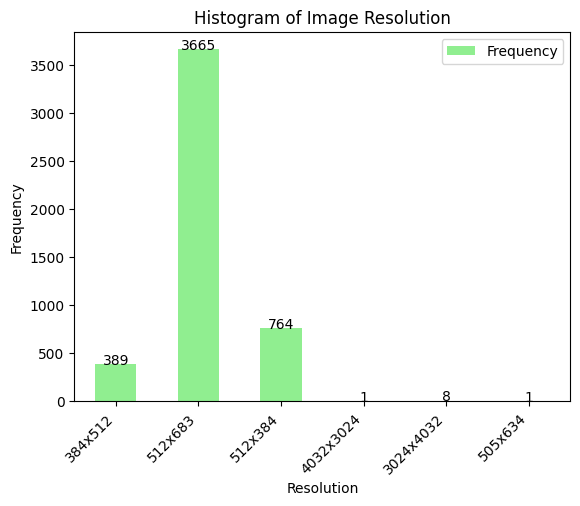

In [ ]:
# plot shape of images

print(df_is_sum)

plt.figure(figsize=(10, 6))
df_is_sum.plot(x='Value', y='Frequency', kind='bar', color='lightgreen')
plt.title('Histogram of Image Resolution')
plt.xlabel('Resolution')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(df_is_sum['Frequency']):
    plt.text(i, value + 0.1, str(value), ha='center')

plt.show()

In [ ]:
## trash box

trashbox_path = '/content/drive/MyDrive/MIDS Capstone/Datasets/TrashBox_train_set/'

trashbox_folders = os.listdir(trashbox_path)
if '.DS_Store' in trashbox_folders:
    trashbox_folders.remove('.DS_Store')

df_tb = pd.DataFrame(columns = trashbox_folders)

for f in trashbox_folders:
  folder_path = os.path.join(trashbox_path, f)

  if os.path.isdir(folder_path):
    print(f)
    files_in_folder = os.listdir(folder_path)
    num_files = len(files_in_folder)

    df_tb.loc[0, f] = num_files


print(df_tb)

e-waste
paper
plastic
cardboard
glass
metal
medical
  e-waste paper plastic cardboard glass metal medical
0    2406  2156    2135      1930  2022  2068    1585


<ipython-input-143-c749abba988c>:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (folder, value) in enumerate(df_tb.sum().iteritems()):


0 2406
1 2156
2 2135
3 1930
4 2022
5 2068
6 1585


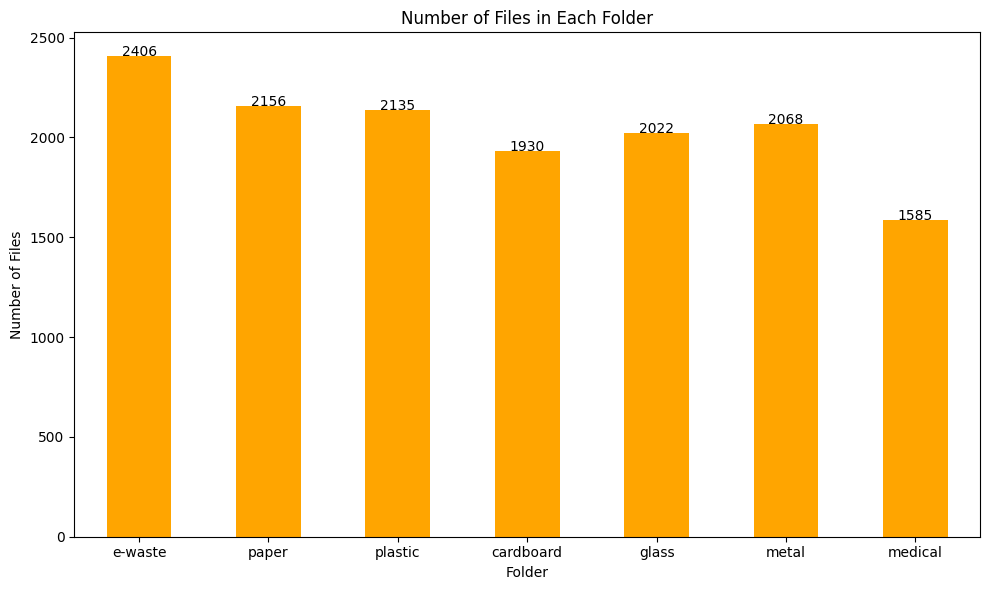

In [ ]:
plt.figure(figsize=(10, 6))
df_tb.sum().plot(kind='bar', color='orange')
plt.title('Number of Files in Each Folder')
plt.xlabel('Folder')
plt.ylabel('Number of Files')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()

for i, (folder, value) in enumerate(df_tb.sum().iteritems()):
    print(i, value)
    plt.text(i, value + 0.1, str(value), ha='center')

plt.show()

In [ ]:
# find format of images

ff_list = []

for f in trashbox_folders:
  folder_path = os.path.join(trashbox_path, f)

  if os.path.isdir(folder_path):
    files_in_folder = os.listdir(folder_path)

    for file in files_in_folder:
        full_path = os.path.join(folder_path, file)

        root, extension = os.path.splitext(full_path)

        # Extract the file format (extension)
        file_format = extension[1:]  # Remove the leading dot

        ff_list.append(file_format)

ff_list = [s.upper() for s in ff_list]

counter = Counter(ff_list)

ff_sum = [(item, count) for item, count in counter.items()]
df_ff_sum = pd.DataFrame(ff_sum, columns=['Value', 'Frequency'])


print(df_ff_sum)

  Value  Frequency
0   JPG      14302


0 14302


<Figure size 1000x600 with 0 Axes>

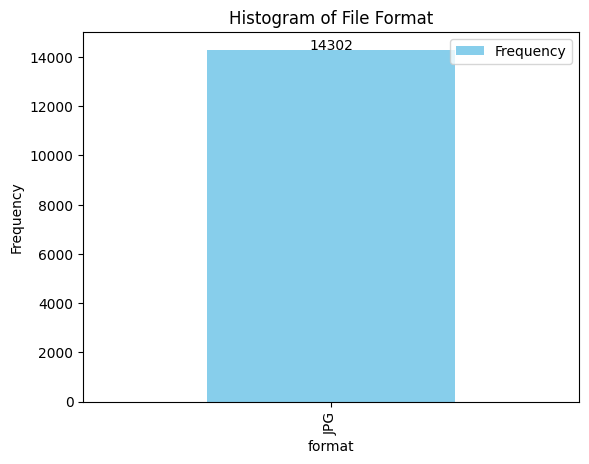

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
df_ff_sum.plot(x='Value', y='Frequency', kind='bar', color='skyblue')
plt.title('Histogram of File Format')
plt.xlabel('format')
plt.ylabel('Frequency')

for i, value in enumerate(df_ff_sum['Frequency']):
    print(i, value)
    plt.text(i, value + 0.1, str(value), ha='center')

plt.show()

In [ ]:
# find shape of images

imgshape_list = []

for f in trashbox_folders:
  folder_path = os.path.join(trashbox_path, f)

  if os.path.isdir(folder_path):
    files_in_folder = os.listdir(folder_path)

    for file in files_in_folder:
        full_path = os.path.join(folder_path, file)
        im = Image.open(full_path, 'r')

        image_size = str(im.size[0])+ 'x' + str(im.size[1])
        imgshape_list.append(image_size)
        #print(image_size)

counter = Counter(imgshape_list)
is_sum = [(item, count) for item, count in counter.items()]

df_is_sum = pd.DataFrame(is_sum, columns=['Value', 'Frequency'])

UnidentifiedImageError: cannot identify image file '/content/drive/MyDrive/MIDS Capstone/Datasets/TrashBox_train_set/paper/paper 2273.jpg'

In [ ]:
fp = '/content/drive/MyDrive/MIDS Capstone/Datasets/TrashBox_train_set/paper/paper 2273.jpg'

img = Image.open(fp)
img.show()


In [ ]:
# plot shape of images

print(df_is_sum)

plt.figure(figsize=(10, 6))
df_is_sum.plot(x='Value', y='Frequency', kind='bar', color='lightgreen')
plt.title('Histogram of Image Resolution')
plt.xlabel('Resolution')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(df_is_sum['Frequency']):
    plt.text(i, value + 0.1, str(value), ha='center')

plt.show()